In [113]:
#import required analytics libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

# hog feature extraction library
from skimage.feature import hog

# Classification algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Spliting train and test data
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder

# Deep Learning Libraries
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense
from keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
#read the dataset

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
#Information about the dataset

print(f"Size of training dataset is {train.shape}")
print(f"Size of testing dataset is {test.shape}")

Size of training dataset is (42000, 785)
Size of testing dataset is (28000, 784)


In [4]:
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## In the above dataset, 1st column is target/label data and the remaining onces are input data

In [5]:
test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Lests separate input data and target data

In [6]:
X=train.iloc[:,1:]
y=train.iloc[:,0]

In [7]:
X.shape,y.shape

((42000, 784), (42000,))

### Since there are 784 flattened pixels, we can convert 1 d data into 2 dimensional picuture with shape (28,28)

In [8]:
int(np.sqrt(X.shape[1]))

28

### Lets visualize 1st 10 images

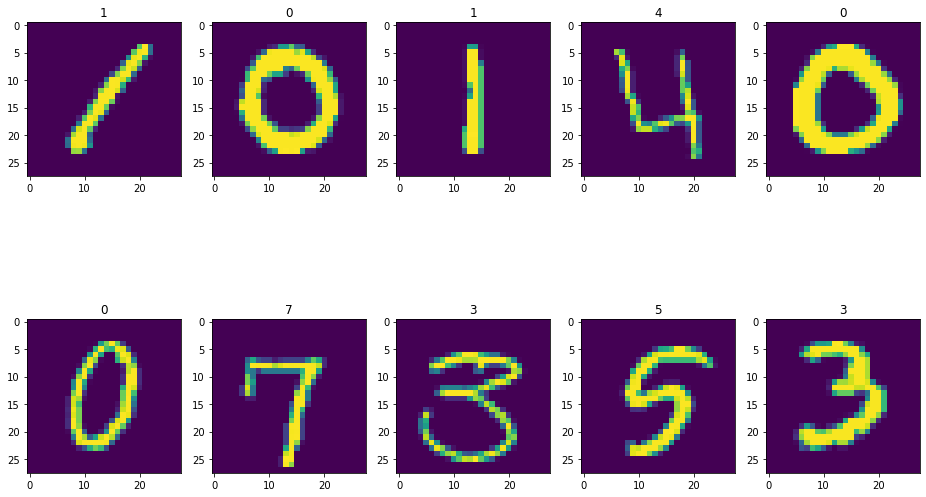

In [9]:
fig,ax=pl.subplots(2,5,figsize=(16,10))
axes=ax.ravel()
for i in range(10):
    temp=X.iloc[i,:]
    axes[i].set_title(y[i])
    temp=np.array(temp).reshape(28,28)
    axes[i].imshow(temp)
pl.show()

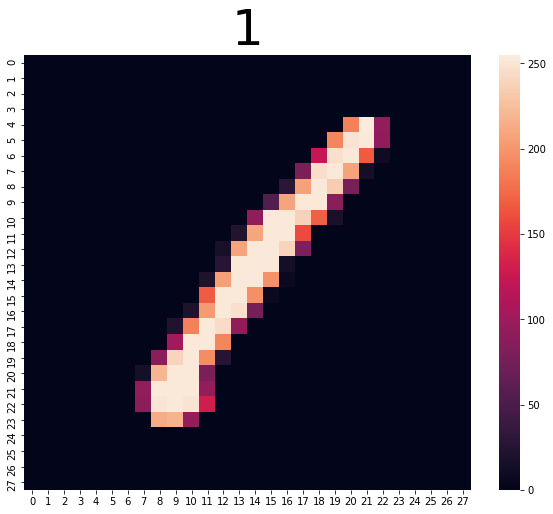

In [10]:
pl.figure(figsize=(10,8))
sns.heatmap(np.array(X.iloc[0,:]).reshape(28,28))
pl.title(y[0],size=50)
pl.show()

### number of available pixels in above image digit i.e 1

In [11]:
image=X.iloc[0,:]
print(f'There are {len(np.where(image!=0)[0])} pixels availble among {len(image)} pixels')
print('Therefore there are only 97 pixel features relavant to us')

There are 97 pixels availble among 784 pixels
Therefore there are only 97 pixel features relavant to us


### creating hog features of input data

### image before and after applying hog for digit 1


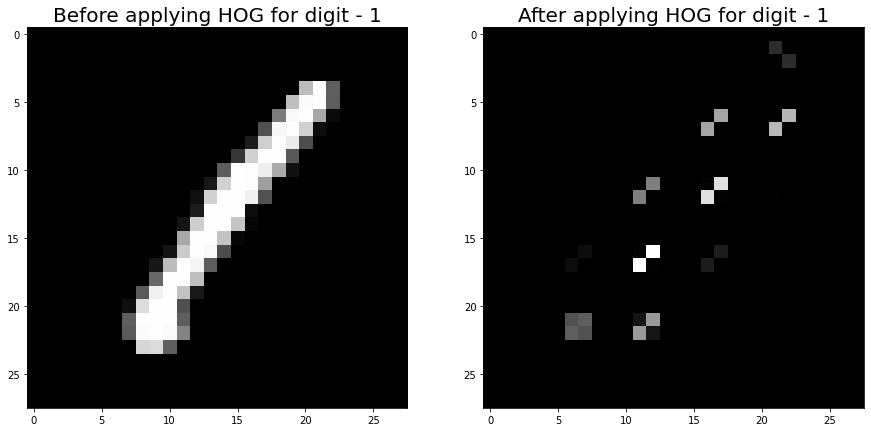

In [12]:
image=np.array(X.iloc[0,:]).reshape(28,28)

pl.figure(figsize=(15,8))
pl.subplot(1,2,2)
fd, hog_image = hog(image, orientations=10, pixels_per_cell=(5,5),
                cells_per_block=(2,2), visualize=True, multichannel=False)
pl.title(f"After applying HOG for digit - {y[0]}",size=20)
pl.imshow(hog_image,cmap='gray')


pl.subplot(1,2,1)
pl.title(f"Before applying HOG for digit - {y[0]}",size=20)
pl.imshow(image,cmap='gray')

pl.show()

### image before and after applying hog for digit 0


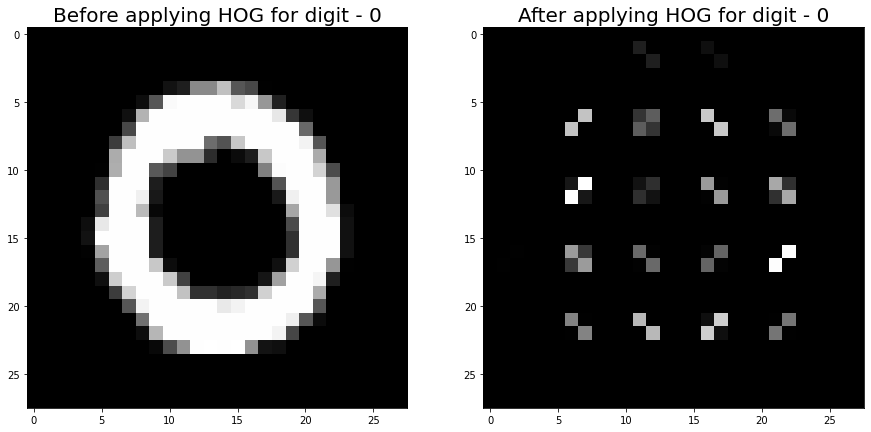

In [13]:
image=np.array(X.iloc[1,:]).reshape(28,28)

pl.figure(figsize=(15,8))
pl.subplot(1,2,2)
fd, hog_image = hog(image, orientations=10, pixels_per_cell=(5,5),
                cells_per_block=(2,2), visualize=True, multichannel=False)
pl.title(f"After applying HOG for digit - {y[1]}",size=20)
pl.imshow(hog_image,cmap='gray')


pl.subplot(1,2,1)
pl.title(f"Before applying HOG for digit - {y[1]}",size=20)
pl.imshow(image,cmap='gray')

pl.show()

# Creating HOG Features for all training datasets

In [15]:
X_data=[]

In [16]:
for i in range(len(X)):
    _, hog_image = hog(X[i].reshape(28,-1), orientations=10, pixels_per_cell=(5,5),
                cells_per_block=(2,2), visualize=True, multichannel=False)
    X_data.append(hog_image)

# Before


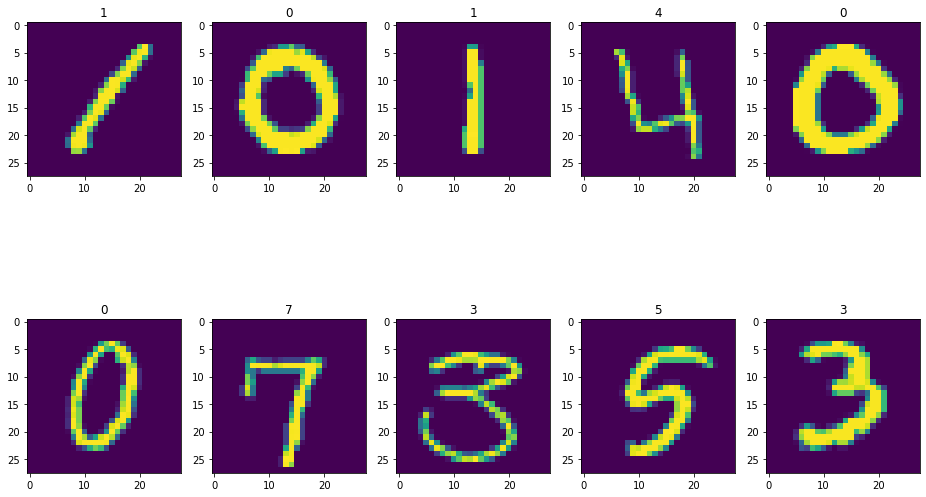

In [17]:

fig,ax=pl.subplots(2,5,figsize=(16,10))
axes=ax.ravel()
for i in range(10):
    temp=X[i]
    axes[i].set_title(y[i])
    temp=np.array(temp).reshape(28,28)
    axes[i].imshow(temp)
pl.show()

# After

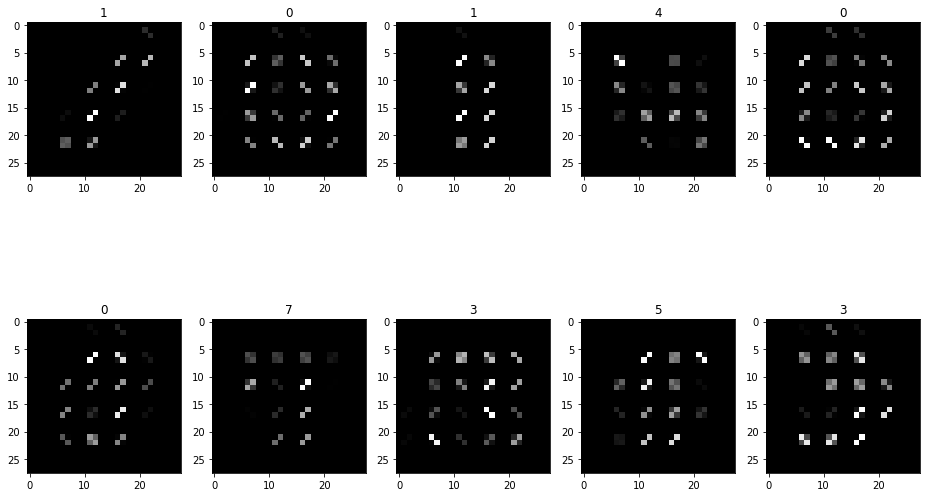

In [18]:
fig,ax=pl.subplots(2,5,figsize=(16,10))
axes=ax.ravel()
for i in range(10):
    temp=X_data[i]
    axes[i].set_title(y[i])
    temp=np.array(temp).reshape(28,28)
    axes[i].imshow(temp,cmap='gray')
pl.show()

## Splitting data into train and test to check how model performs

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X_data,y,test_size=.3)
X_train=np.array(X_train).reshape(len(X_train),-1)
X_test=np.array(X_test).reshape(len(X_test),-1)

# KNN Classifier

In [20]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
# knn.score(X_train,y_train),knn.score(X_test,y_test)

In [22]:
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [24]:
knn_prediction=knn.predict(X_test)

In [43]:
print(f'Accuracy on testing data for KNN algorithm is {accuracy_score(knn_prediction,y_test)}')

Accuracy on testing data for KNN algorithm is 0.9358730158730159


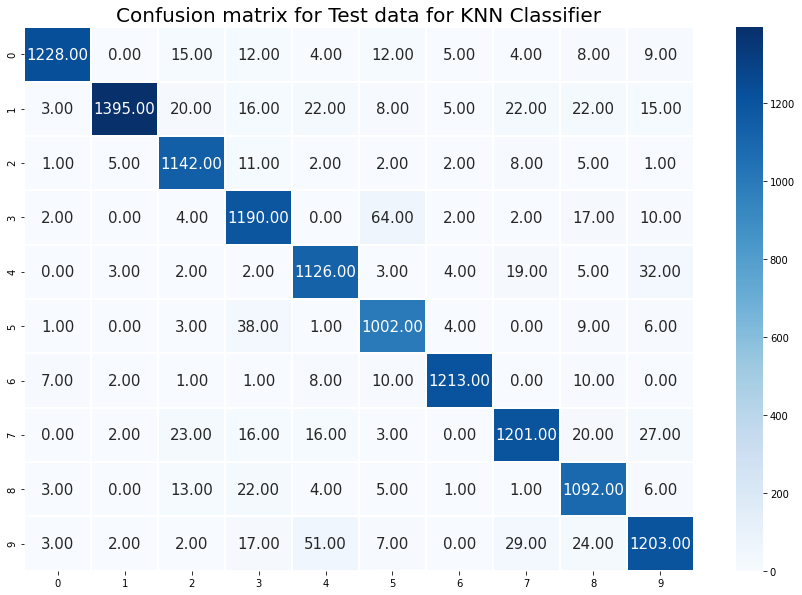

In [42]:
pl.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(knn_prediction,y_test),annot=True,
           fmt='.2f',
            linewidth=1,
            cmap='Blues',
           annot_kws={'size':15})
pl.title('Confusion matrix for Test data for KNN Classifier',size=20)
pl.show()

In [44]:
svm_predict=svc.predict(X_test)

In [45]:
print(f'Accuracy on testing data for SVM algorithm is {accuracy_score(svm_predict,y_test)}')

Accuracy on testing data for SVM algorithm is 0.9533333333333334


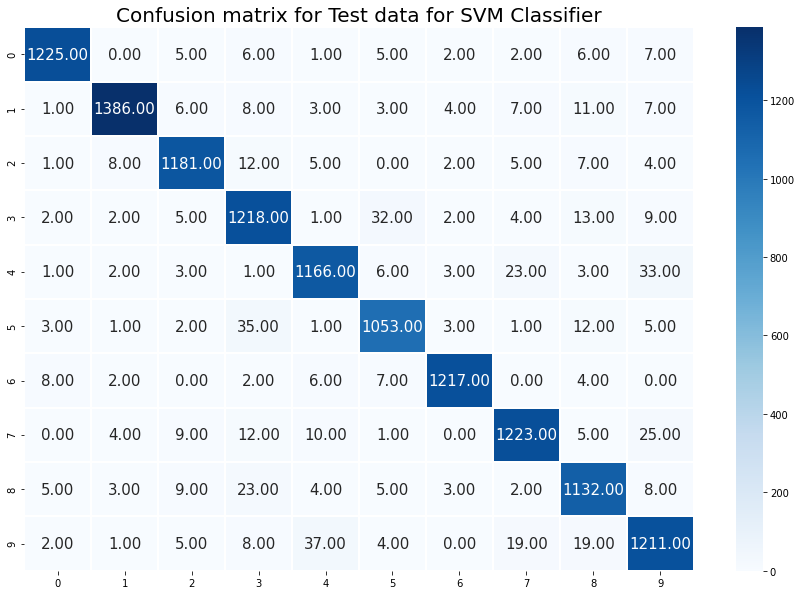

In [46]:
pl.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(svm_predict,y_test),annot=True,
           fmt='.2f',
            linewidth=1,
            cmap='Blues',
           annot_kws={'size':15})
pl.title('Confusion matrix for Test data for SVM Classifier',size=20)
pl.show()

# Convolution Neural Network

In [60]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
input_shape = X_train.shape[1:]

In [85]:
a = np.array(y_train)
y_train = np.zeros((a.size, a.max()+1))
y_train[np.arange(a.size),a] = 1

In [88]:
a = np.array(y_test)
y_test = np.zeros((a.size, a.max()+1))
y_test[np.arange(a.size),a] = 1

In [89]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )

model.add(Conv2D(filters = 32, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )

model.add(Conv2D(filters = 64, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )

model.add(Conv2D(filters = 128, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )

model.add(Conv2D(filters = 256, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.25) )

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

In [90]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_40 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_41 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 7, 7, 32)        

In [91]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [92]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
919/919 [==============================] - 29s 31ms/step - loss: 0.8097 - accuracy: 0.7254 - val_loss: 0.3059 - val_accuracy: 0.9027
Epoch 2/100
919/919 [==============================] - 29s 32ms/step - loss: 0.4093 - accuracy: 0.8686 - val_loss: 0.2077 - val_accuracy: 0.9331
Epoch 3/100
919/919 [==============================] - 29s 32ms/step - loss: 0.3312 - accuracy: 0.8945 - val_loss: 0.1833 - val_accuracy: 0.9402
Epoch 4/100
919/919 [==============================] - 30s 33ms/step - loss: 0.2874 - accuracy: 0.9073 - val_loss: 0.1878 - val_accuracy: 0.9429
Epoch 5/100
919/919 [==============================] - 31s 33ms/step - loss: 0.2646 - accuracy: 0.9157 - val_loss: 0.1661 - val_accuracy: 0.9490
Epoch 6/100
919/919 [==============================] - 31s 34ms/step - loss: 0.2488 - accuracy: 0.9224 - val_loss: 0.1558 - val_accuracy: 0.9517
Epoch 7/100
919/919 [==============================] - 31s 34ms/step - loss: 0.2340 - accuracy: 0.9258 - val_loss: 0.1543 - val_ac

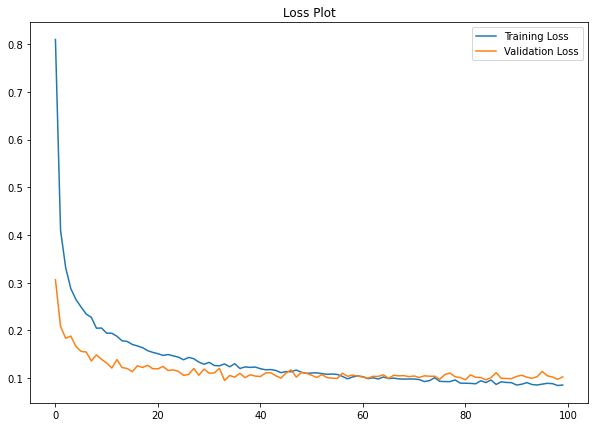

In [157]:
pl.figure(figsize=(10,7))
pl.title("Loss Plot")
pl.plot(history.history['loss'],label='Training Loss')
pl.plot(history.history['val_loss'],label='Validation Loss')
pl.legend()
pl.show()

## Loss is Decreasing drastingly

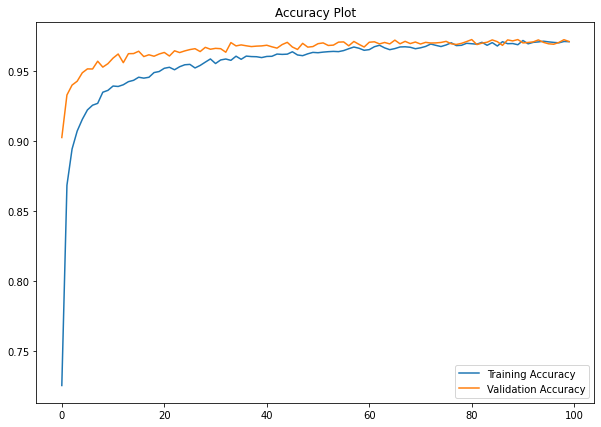

In [159]:
pl.figure(figsize=(10,7))
pl.title("Accuracy Plot")
pl.plot(history.history['accuracy'],label='Training Accuracy')
pl.plot(history.history['val_accuracy'],label='Validation Accuracy')
pl.legend()
pl.show()

## Accuracy is increasing drasticly

In [147]:
cnn_prediction=model.predict(X_test)

In [143]:
cnn_prediction=np.round(cnn_prediction,1)
cnn_prediction=np.where(cnn_prediction==1)[1]
testing_y=np.where(y_test==1)[1]

In [167]:
print(f'Training accuracy is {model.evaluate(X_train,y_train)[1]}')

919/919 [==============================] - 4s 5ms/step - loss: 0.0171 - accuracy: 0.9946
Training accuracy is 0.9946258664131165


In [168]:
print(f'Testing accuracy is {model.evaluate(X_test,y_test)[1]}')

394/394 [==============================] - 2s 5ms/step - loss: 0.1024 - accuracy: 0.9713
Testing accuracy is 0.9712698459625244
